# Modulo 4: Análisis de datos y Seaborn

En este notebook se realiza un análisis estadístico de algunas variables agregadas de la encuesta de presupuestos y gastos de los hogares.

## **Importación de librerías**

In [1]:
import pandas as pd ## Manejo de DataFrames, que son el insumo principal del análisis estadístico
import numpy as np ## Cálculo científico, calculadora científica
import matplotlib.pyplot as plt ## Gráficos básicos
import seaborn as sns ## Gráficos avanzados

## **Conexión con google drive**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## **Cargue del archivo a analizar**

In [2]:
df_data = pd.read_excel(r'C:\Carrera de Datos\Data Scientist\Diplomado Python EAN\Archivos\final_df.xlsx')

In [6]:
df_data.head(4) ## Contenido de los primeros registros

,DIRECTORIO,Sexo,Edad,Estado_Civil,Región,recibio_rentas_capital,Percepción_ingreso,Servicios,Bienes,Empleabilidad,Horas,nivel_edu,tipo_casa,estrato,tipo_vivienda,total_ingresos
0,118277,Hombre,28,Esta soltero (a),Pacífica,No,No son suficientes,5,71.0,0.40,0.0,5.6,1,2.0,3,335583.333333
1,118278,Mujer,26,Esta soltero (a),Pacífica,No,No son suficientes,5,75.0,0.25,0.0,4.0,1,2.0,3,190000.000000
2,118279,Mujer,22,No esta casado(a) y vive en pareja hace dos añ...,Pacífica,No,Son suficientes,5,165.0,0.50,0.0,8.0,2,1.0,3,937500.000000
3,118280,Hombre,33,Esta soltero (a),Pacífica,No,No son suficientes,4,54.0,1.00,0.0,4.0,2,2.0,1,700000.000000


In [7]:
df_data.columns.to_list()  ## Nombres de las columnas

['DIRECTORIO',
 'Sexo',
 'Edad',
 'Estado_Civil',
 'Región',
 'recibio_rentas_capital',
 'Percepción_ingreso',
 'Servicios',
 'Bienes',
 'Empleabilidad',
 'Horas',
 'nivel_edu',
 'tipo_casa',
 'estrato',
 'tipo_vivienda',
 'total_ingresos']

## **Análisis descriptivo básico**

In [8]:
# Determina el número de registros y columnas del conjunto de datos
df_data.shape

(59043, 16)

In [9]:
#df_data.describe()
round(df_data.describe(),3) ## análisis descriptivo básico: cantidad, media, desviación estándar, mínimo, máximo, cuartiles

,DIRECTORIO,Edad,Servicios,Bienes,Empleabilidad,Horas,nivel_edu,tipo_casa,estrato,tipo_vivienda,total_ingresos
count,59043.000,59043.000,59043.000,59043.000,59043.000,59043.000,59043.000,59043.000,58654.000,59043.000,5.904300e+04
mean,443118.242,38.855,4.362,171.933,0.545,1.458,7.568,1.445,2.057,2.233,7.708629e+05
std,174309.502,13.177,1.030,240.235,0.315,7.217,4.206,0.589,1.068,1.263,1.530152e+06
min,118277.000,14.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,2.500000e+04
25%,312285.500,29.000,4.000,43.000,0.333,0.000,4.200,1.000,1.000,1.000,2.166667e+05
50%,441458.000,36.000,5.000,107.000,0.500,0.000,7.000,1.000,2.000,3.000,4.260000e+05
75%,591637.500,46.000,5.000,231.000,0.750,0.000,10.000,2.000,3.000,3.000,8.251502e+05
max,743604.000,107.000,5.000,27888.000,1.500,182.000,16.000,6.000,9.000,6.000,1.450000e+08


In [10]:
df_data.skew() ## Sesgadez o asimetría

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2952\914112937.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.skew() ## Sesgadez o asimetría


DIRECTORIO        -0.180123
Edad               1.032551
Servicios         -1.750508
Bienes            32.815546
Empleabilidad      0.038664
Horas              7.123157
nivel_edu          0.550369
tipo_casa          1.352648
estrato            1.329156
tipo_vivienda      0.493727
total_ingresos    24.143634
dtype: float64

In [11]:
df_data.kurt() ## Curtosis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2952\2060410184.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.kurt() ## Curtosis


DIRECTORIO          -1.106662
Edad                 0.759703
Servicios            2.521508
Bienes            3153.395592
Empleabilidad       -0.881360
Horas               69.908509
nivel_edu           -0.534144
tipo_casa            3.298206
estrato              3.559867
tipo_vivienda       -0.700782
total_ingresos    1592.964637
dtype: float64

### **Impresión de la sesgadez y la curtosis de la variable edad**

In [12]:
print('La curtosis de la variable edad es:{}'.format(round(df_data["Edad"].kurt(),3)))
print('La sesgadez de la variable edad es: {}'.format(round(df_data["Edad"].skew(),3)))

La curtosis de la variable edad es:0.76
La sesgadez de la variable edad es: 1.033


In [14]:
print('La curtosis de la variable edad es:{}'.format(round(df_data["total_ingresos"].kurt(),3)))
print('La sesgadez de la variable edad es: {}'.format(round(df_data["total_ingresos"].skew(),3)))

La curtosis de la variable edad es:1592.965
La sesgadez de la variable edad es: 24.144


## **Recodificación de variables**

Dado que las variables Tipo de vivienda, Tipo de casa y Estrato las está interpretando como variables cuantitativas las vamos a recodificar a variables cualitativas

In [16]:
df_data.tipo_vivienda.value_counts()

1    27275
3    21793
4     5816
2     1809
5     1784
6      566
Name: tipo_vivienda, dtype: int64

In [17]:
df_data["tipo_vivienda"]=df_data["tipo_vivienda"].replace([1,2,3,4,5,6],["Casa","Apartamento","Cuarto en Inquilinato","Cuarto Otro","Indígena","Otra"])

In [18]:
df_data.tipo_vivienda.value_counts()

Casa                     27275
Cuarto en Inquilinato    21793
Cuarto Otro               5816
Apartamento               1809
Indígena                  1784
Otra                       566
Name: tipo_vivienda, dtype: int64

In [20]:
df_data.estrato.value_counts()

2.0    21124
1.0    20386
3.0    12347
4.0     3055
5.0      998
6.0      481
0.0      165
9.0       98
Name: estrato, dtype: int64

In [21]:
df_data["estrato"]=df_data["estrato"].replace([0,1,2,3,4,5,6,9],["0","1","2","3","4","5","6",np.nan])

In [29]:
df_data["estrato"].value_counts(dropna=False)

2      21124
1      20386
3      12347
4       3055
5        998
NaN      487
6        481
0        165
Name: estrato, dtype: int64

In [25]:
df_data["tipo_casa"].value_counts()

1    35024
2    22329
3     1198
4      424
5       48
6       20
Name: tipo_casa, dtype: int64

In [26]:
df_data["tipo_casa"]=df_data["tipo_casa"].replace([1,2,3,4,5,6],["Propia pagada","Propia pagando", "En arriendo", "En usufructo","Sin título","Otra"])

In [27]:
df_data["tipo_casa"].value_counts()

Propia pagada     35024
Propia pagando    22329
En arriendo        1198
En usufructo        424
Sin título           48
Otra                 20
Name: tipo_casa, dtype: int64

Modificar el formato de salida de los datos

In [28]:
pd.set_option('display.float_format',lambda x:'%.3f'% x)

In [34]:
df_data.describe()

,Edad,Servicios,Bienes,Empleabilidad,Horas,nivel_edu,total_ingresos
count,59043.000,59043.000,59043.000,59043.000,59043.000,59043.000,59043.000
mean,38.855,4.362,171.933,0.545,1.458,7.568,770862.931
std,13.177,1.030,240.235,0.315,7.217,4.206,1530151.620
min,14.000,0.000,0.000,0.000,0.000,0.000,25000.000
25%,29.000,4.000,43.000,0.333,0.000,4.200,216666.667
50%,36.000,5.000,107.000,0.500,0.000,7.000,426000.000
75%,46.000,5.000,231.000,0.750,0.000,10.000,825150.167
max,107.000,5.000,27888.000,1.500,182.000,16.000,145000000.000


In [33]:
df_data = df_data.drop('DIRECTORIO', axis=1)

## **Definición de variables cuantitativas y cualitativas**

In [35]:
## Variables del conjunto de datos
df_data.columns

Index(['Sexo', 'Edad', 'Estado_Civil', 'Región', 'recibio_rentas_capital',
       'Percepción_ingreso', 'Servicios', 'Bienes', 'Empleabilidad', 'Horas',
       'nivel_edu', 'tipo_casa', 'estrato', 'tipo_vivienda', 'total_ingresos'],
      dtype='object')

In [40]:
## Variables cualitativas
cualitativas=['Sexo', 'Estado_Civil', 'Región', 'tipo_casa', 'estrato',
       'tipo_vivienda', 'recibio_rentas_capital', 'Percepción_ingreso']
display(cualitativas)

['Sexo',
 'Estado_Civil',
 'Región',
 'tipo_casa',
 'estrato',
 'tipo_vivienda',
 'recibio_rentas_capital',
 'Percepción_ingreso']

In [41]:
## Variables cuantitativas
cuantitativas=df_data.columns.drop(cualitativas)
display(cuantitativas)

Index(['Edad', 'Servicios', 'Bienes', 'Empleabilidad', 'Horas', 'nivel_edu',
       'total_ingresos'],
      dtype='object')

## **Análisis estadístico de variables cuantitativas**

In [42]:
## Análisis descriptivo básico
df_data[cuantitativas].describe()

,Edad,Servicios,Bienes,Empleabilidad,Horas,nivel_edu,total_ingresos
count,59043.000,59043.000,59043.000,59043.000,59043.000,59043.000,59043.000
mean,38.855,4.362,171.933,0.545,1.458,7.568,770862.931
std,13.177,1.030,240.235,0.315,7.217,4.206,1530151.620
min,14.000,0.000,0.000,0.000,0.000,0.000,25000.000
25%,29.000,4.000,43.000,0.333,0.000,4.200,216666.667
50%,36.000,5.000,107.000,0.500,0.000,7.000,426000.000
75%,46.000,5.000,231.000,0.750,0.000,10.000,825150.167
max,107.000,5.000,27888.000,1.500,182.000,16.000,145000000.000


In [43]:
### Coeficiente de asimetría
pd.DataFrame(df_data.skew()).T

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2952\4185878655.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(df_data.skew()).T


,Edad,Servicios,Bienes,Empleabilidad,Horas,nivel_edu,estrato,total_ingresos
0,1.033,-1.751,32.816,0.039,7.123,0.550,1.004,24.144


In [44]:
### Coeficiente de curtosis
pd.DataFrame(df_data.kurt()).T

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2952\619378590.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(df_data.kurt()).T


,Edad,Servicios,Bienes,Empleabilidad,Horas,nivel_edu,estrato,total_ingresos
0,0.760,2.522,3153.396,-0.881,69.909,-0.534,1.178,1592.965


### **Análisis gráfico de las variables cuantitativas**

#### **Diagramas de cajas**

<AxesSubplot: >

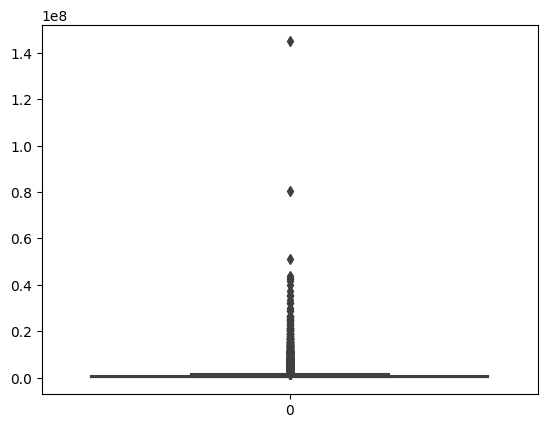

In [45]:
# Diagrama de cajas o boxplot de la variable ingresos
sns.boxplot(data=df_data["total_ingresos"])

Como la variable ingresos tiene valores atípicos anormales se va a realizar el análisis sin estos. Por tanto, se calculan el primer cuartil, el tercero  y el recorrido intercuartil de esta variable. 

In [47]:
q1 = df_data.total_ingresos.quantile(0.25)   #Cálculo del primer cuartil
q3 = df_data.total_ingresos.quantile(0.75)   #Cálculo del tercer cuartil
q2 = df_data.total_ingresos.quantile(0.5)    #Cálculo de la mediana
RIQ = q3-q1                            #Recorrido intercuantil
ati_inf= q1-1.5*RIQ                    #límite superior de los atípicos inferiores
ati_sup= q3+1.5*RIQ                    #límite inferior de los atípicos superiores 
ati_anor_inf = q1-3*RIQ                #límite superior de los atípicos anormales inferiores
ati_anor_sup = q3+3*RIQ                #límite inferior de los atípicos anormales superiores

print("El primer cuartil de la variable ingresos es {}".format(round(q1,3)))
print("El tercer cuartil de la variable ingresos es {}".format(round(q3,3)))
print("El segundo cuartil de la variable ingresos es {}".format(round(q2,3)))
print("El recorrido intercuartil de la variable ingresos es {}".format(round(RIQ,3)))
print("El límite superior de los atípicos inferiores es {}".format(round(ati_inf,3)))
print("El límite inferior de los atípicos superiores es {}".format(round(ati_sup,3)))
print("El límite inferior de los atípicos anormales superiores es {}".format(round(ati_anor_sup,3)))
print("El límite superior de los atípicos anormales inferiores es {}".format(round(ati_anor_inf,3)))
print("\nDado que el límite superior de los atípicos anormales inferiores es negativo \ny la varible ingreso sólo toma valores positivos no hay valores atípicos inferiores.\nPor tanto, sólo se hará el análisis con las valores menores al límite inferior de los atípicos anormales superiroes")


El primer cuartil de la variable ingresos es 216666.667
El tercer cuartil de la variable ingresos es 825150.167
El segundo cuartil de la variable ingresos es 426000.0
El recorrido intercuartil de la variable ingresos es 608483.5
El límite superior de los atípicos inferiores es -696058.583
El límite inferior de los atípicos superiores es 1737875.417
El límite inferior de los atípicos anormales superiores es 2650600.667
El límite superior de los atípicos anormales inferiores es -1608783.833

Dado que el límite superior de los atípicos anormales inferiores es negativo 
y la varible ingreso sólo toma valores positivos no hay valores atípicos inferiores.
Por tanto, sólo se hará el análisis con las valores menores al límite inferior de los atípicos anormales superiroes


In [48]:
##Cantidad de datos que no son atípicos anormales para el ingreso
print("Cantidad de datos que no son atípicos anormales para el ingreso")
print(df_data[df_data.total_ingresos<ati_anor_sup].shape)

##Cantidad de datos que son atípicos anormales para el ingreso
print("Cantidad de datos atípicos anormales para el ingreso")
print(df_data[df_data.total_ingresos>=ati_anor_sup].shape)

Cantidad de datos que no son atípicos anormales para el ingreso
(56428, 15)
Cantidad de datos atípicos anormales para el ingreso
(2615, 15)


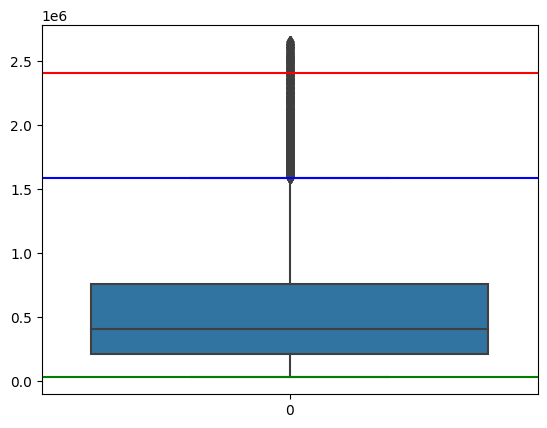

In [50]:
# Diagrama de cajas o boxplot de la variable ingresos
sns.boxplot(data=df_data[df_data.total_ingresos<ati_anor_sup]["total_ingresos"])
min_ing=min(df_data[df_data.total_ingresos<ati_anor_sup]["total_ingresos"])
q1=df_data[df_data.total_ingresos<ati_anor_sup]["total_ingresos"].quantile(0.25)
q3=df_data[df_data.total_ingresos<ati_anor_sup]["total_ingresos"].quantile(0.75)
RIQ=q3-q1
lim_ati=q3+1.5*RIQ
lim_ati_anor=q3+3*RIQ
plt.axhline(min_ing, color='g')
plt.axhline(lim_ati, color='b')
plt.axhline(lim_ati_anor, color='r')

In [51]:
df_data[df_data.total_ingresos<ati_anor_sup]["total_ingresos"].max()

2650000.0

In [52]:
q1 = df_data[df_data.total_ingresos<ati_anor_sup].total_ingresos.quantile(0.25)
q2 = df_data[df_data.total_ingresos<ati_anor_sup].total_ingresos.quantile(0.5)
q3 = df_data[df_data.total_ingresos<ati_anor_sup].total_ingresos.quantile(0.75)
q4 = df_data[df_data.total_ingresos<ati_anor_sup].total_ingresos.quantile(1)
RIQ = q3-q1
ati_anor_inf = q1-3*RIQ
ati_anor_sup = q3+3*RIQ
ati_inf = q1-1.5*RIQ
ati_sup = q3+1.5*RIQ
max_ing=df_data[df_data.total_ingresos<ati_anor_sup]["total_ingresos"].max()
print("El primer cuartil de la variable ingresos es {}".format(round(q1,3)))
print("El tercer cuartil de la variable ingresos es {}".format(round(q3,3)))
print("El segundo cuartil de la variable ingresos es {}".format(round(q2,3)))
print('El ingreso máximo sería: {}'.format(round(q4,3)))
print("El recorrido intercuartil de la variable ingresos es {}".format(round(RIQ,3)))
print("El límite inferior de los atípicos superiores es {}".format(round(ati_sup,3)))
print("El límite superior de los atípicos inferiores es {}".format(round(ati_inf,3)))
print("El límite inferior de los atípicos anormales superiores es {}".format(round(ati_anor_sup,3)))
print("El límite superior de los atípicos anormales inferiores es {}".format(round(ati_anor_inf,3)))
print("\nDado que el límite superior de los atípicos anormales inferiores es negativo \ny la varible ingreso sólo toma valores positivos no hay valores atípicos inferiores.\nPor tanto, sólo se hará el análisis con los valores menores al límite inferior de los atípicos anormales superiores")


El primer cuartil de la variable ingresos es 205000.0
El tercer cuartil de la variable ingresos es 755215.799
El segundo cuartil de la variable ingresos es 405237.5
El ingreso máximo sería: 2650000.0
El recorrido intercuartil de la variable ingresos es 550215.799
El límite inferior de los atípicos superiores es 1580539.497
El límite superior de los atípicos inferiores es -620323.698
El límite inferior de los atípicos anormales superiores es 2405863.194
El límite superior de los atípicos anormales inferiores es -1445647.396

Dado que el límite superior de los atípicos anormales inferiores es negativo 
y la varible ingreso sólo toma valores positivos no hay valores atípicos inferiores.
Por tanto, sólo se hará el análisis con los valores menores al límite inferior de los atípicos anormales superiores


In [ ]:
#¿El 25% de los hogares tiene un índice de bienes menor a qué valor?
#¿Qué valor del índice de bienes se considera normal?
#¿Cuando diríamos que un hogar tiene un índice de bienes anormal?


#### **Histograma**

Histograma de frecuencias absolutas del ingreso. Cantidad de individuos que pertenecen a cada intervalo

In [53]:
print(df_data.total_ingresos.skew())
print(df_data.total_ingresos.kurt())

24.143634482634894
1592.9646374828437


<AxesSubplot: xlabel='total_ingresos', ylabel='Count'>

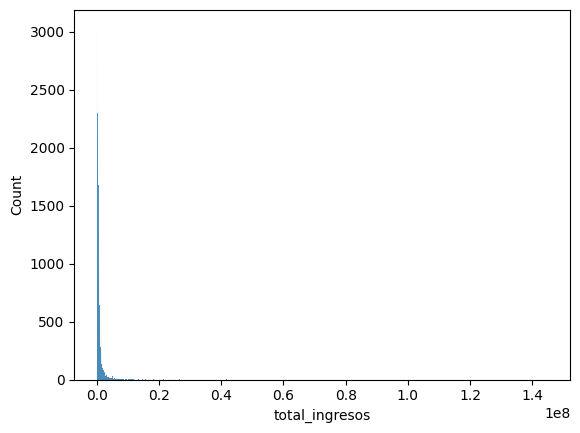

In [54]:
 sns.histplot(data=df_data["total_ingresos"])

In [55]:
print(df_data[df_data.total_ingresos<ati_anor_sup]["total_ingresos"].skew())
print(df_data[df_data.total_ingresos<ati_anor_sup]["total_ingresos"].kurt())

1.4947706563874108
2.091522534838464


<AxesSubplot: xlabel='total_ingresos', ylabel='Count'>

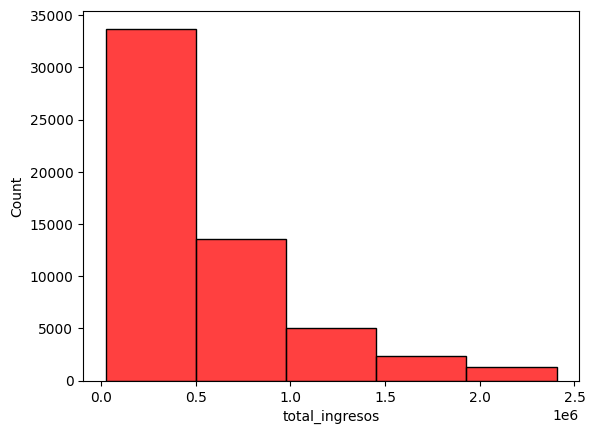

In [58]:
sns.histplot(data=df_data[df_data.total_ingresos<ati_anor_sup]["total_ingresos"], bins=5, color='red')

Función de densidad del ingreso. Porcentaje de individuos que pertenecen a cada intervalo

<AxesSubplot: xlabel='total_ingresos', ylabel='Density'>

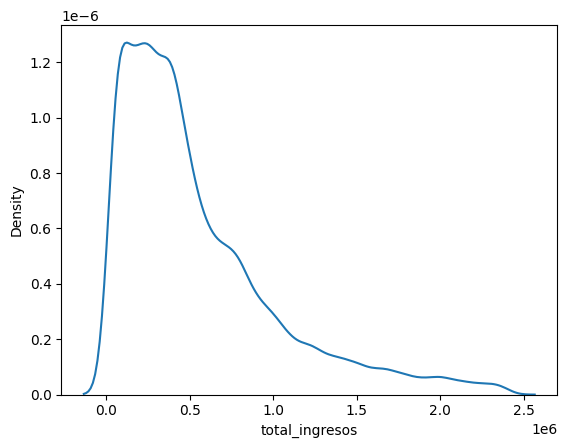

In [59]:
sns.kdeplot(data=df_data[df_data["total_ingresos"]<ati_anor_sup],x="total_ingresos")

In [60]:
print('Sesgadez')
print(df_data[df_data.total_ingresos<ati_anor_sup]["Servicios"].skew())
print('Curtosis')
print(df_data[df_data.total_ingresos<ati_anor_sup]["Servicios"].kurt())

Sesgadez
-1.7317483518776955
Curtosis
2.420746199565453


<AxesSubplot: xlabel='Servicios', ylabel='Density'>

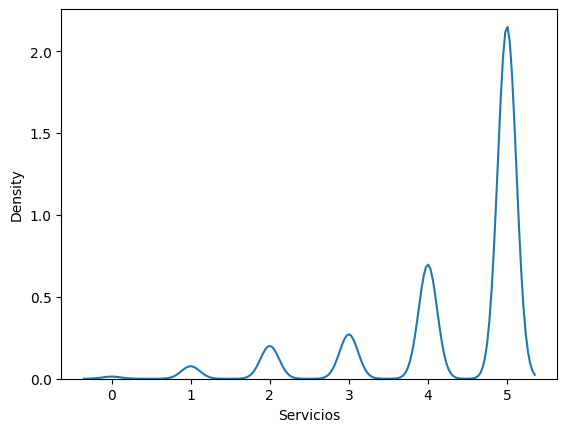

In [61]:
sns.kdeplot(data=df_data[df_data["total_ingresos"]<ati_anor_sup],x="Servicios")

**Análisis gráfico de la variable bienes**

<AxesSubplot: >

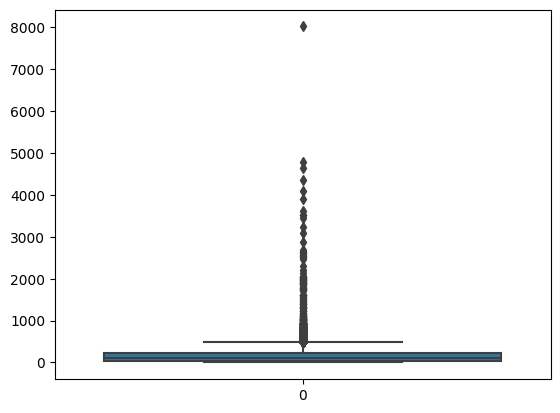

In [62]:
sns.boxplot(data=df_data[df_data.total_ingresos<ati_anor_sup]["Bienes"])

<AxesSubplot: xlabel='Bienes', ylabel='Count'>

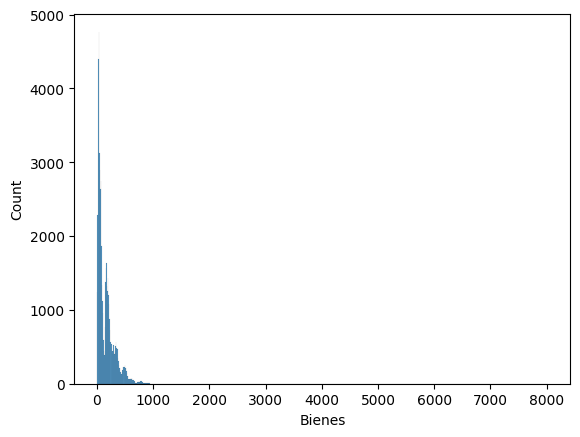

In [63]:
 sns.histplot(data=df_data[df_data.total_ingresos<ati_anor_sup]["Bienes"])

#### **Diagramas de dispersión**

Diagrama de dispersión entre el ingreso y el nivel educativo

In [66]:
df_data.columns

Index(['Sexo', 'Edad', 'Estado_Civil', 'Región', 'recibio_rentas_capital',
       'Percepción_ingreso', 'Servicios', 'Bienes', 'Empleabilidad', 'Horas',
       'nivel_edu', 'tipo_casa', 'estrato', 'tipo_vivienda', 'total_ingresos'],
      dtype='object')

No se evidencia ninguna relación entre el nivel educativo y los ingresos


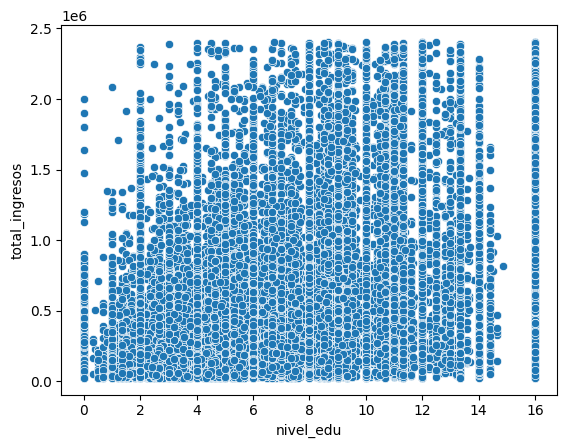

In [67]:
sns.scatterplot(data=df_data[df_data["total_ingresos"]<ati_anor_sup], x="nivel_edu", y="total_ingresos")
print("No se evidencia ninguna relación entre el nivel educativo y los ingresos")

Diagrama de dispersión entre el ingreso y el nivel educativo separando los datos por sexo. Además, se presenta el diagrama de barras de la variable Sexo. Se utiliza la función de varios gráficos en uno sólo.

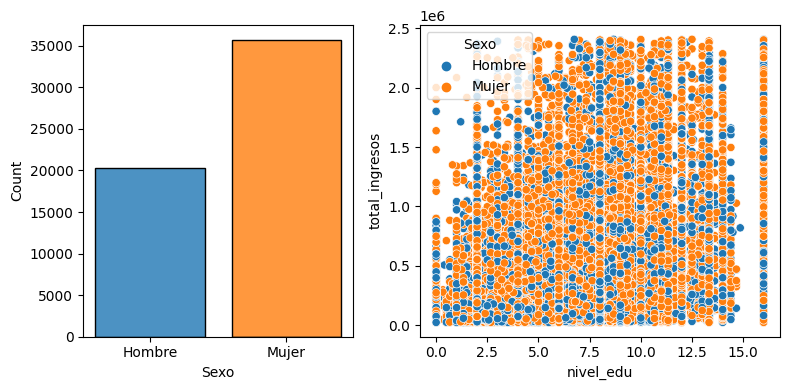

In [68]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[3, 4]))

sns.scatterplot(data=df_data[df_data["total_ingresos"]<ati_anor_sup], x="nivel_edu", y="total_ingresos", hue="Sexo", ax=axs[1])

sns.histplot(data=df_data[df_data["total_ingresos"]<ati_anor_sup], x="Sexo", hue="Sexo", shrink=.8,alpha=.8, legend=False, ax=axs[0])
f.tight_layout()

Diagrama de dispersión discriminando por Sexo y representación de las funciones de densidad para cada variable cuantitativa

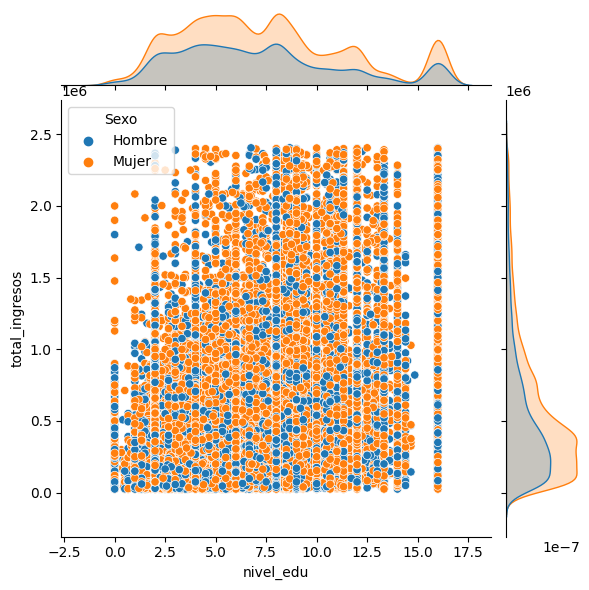

In [69]:
sns.jointplot(data=df_data[df_data["total_ingresos"]<ati_anor_sup], x="nivel_edu", y="total_ingresos", hue="Sexo")

Diagramas de dispersión del cruce de variables cuantitativas por sexo

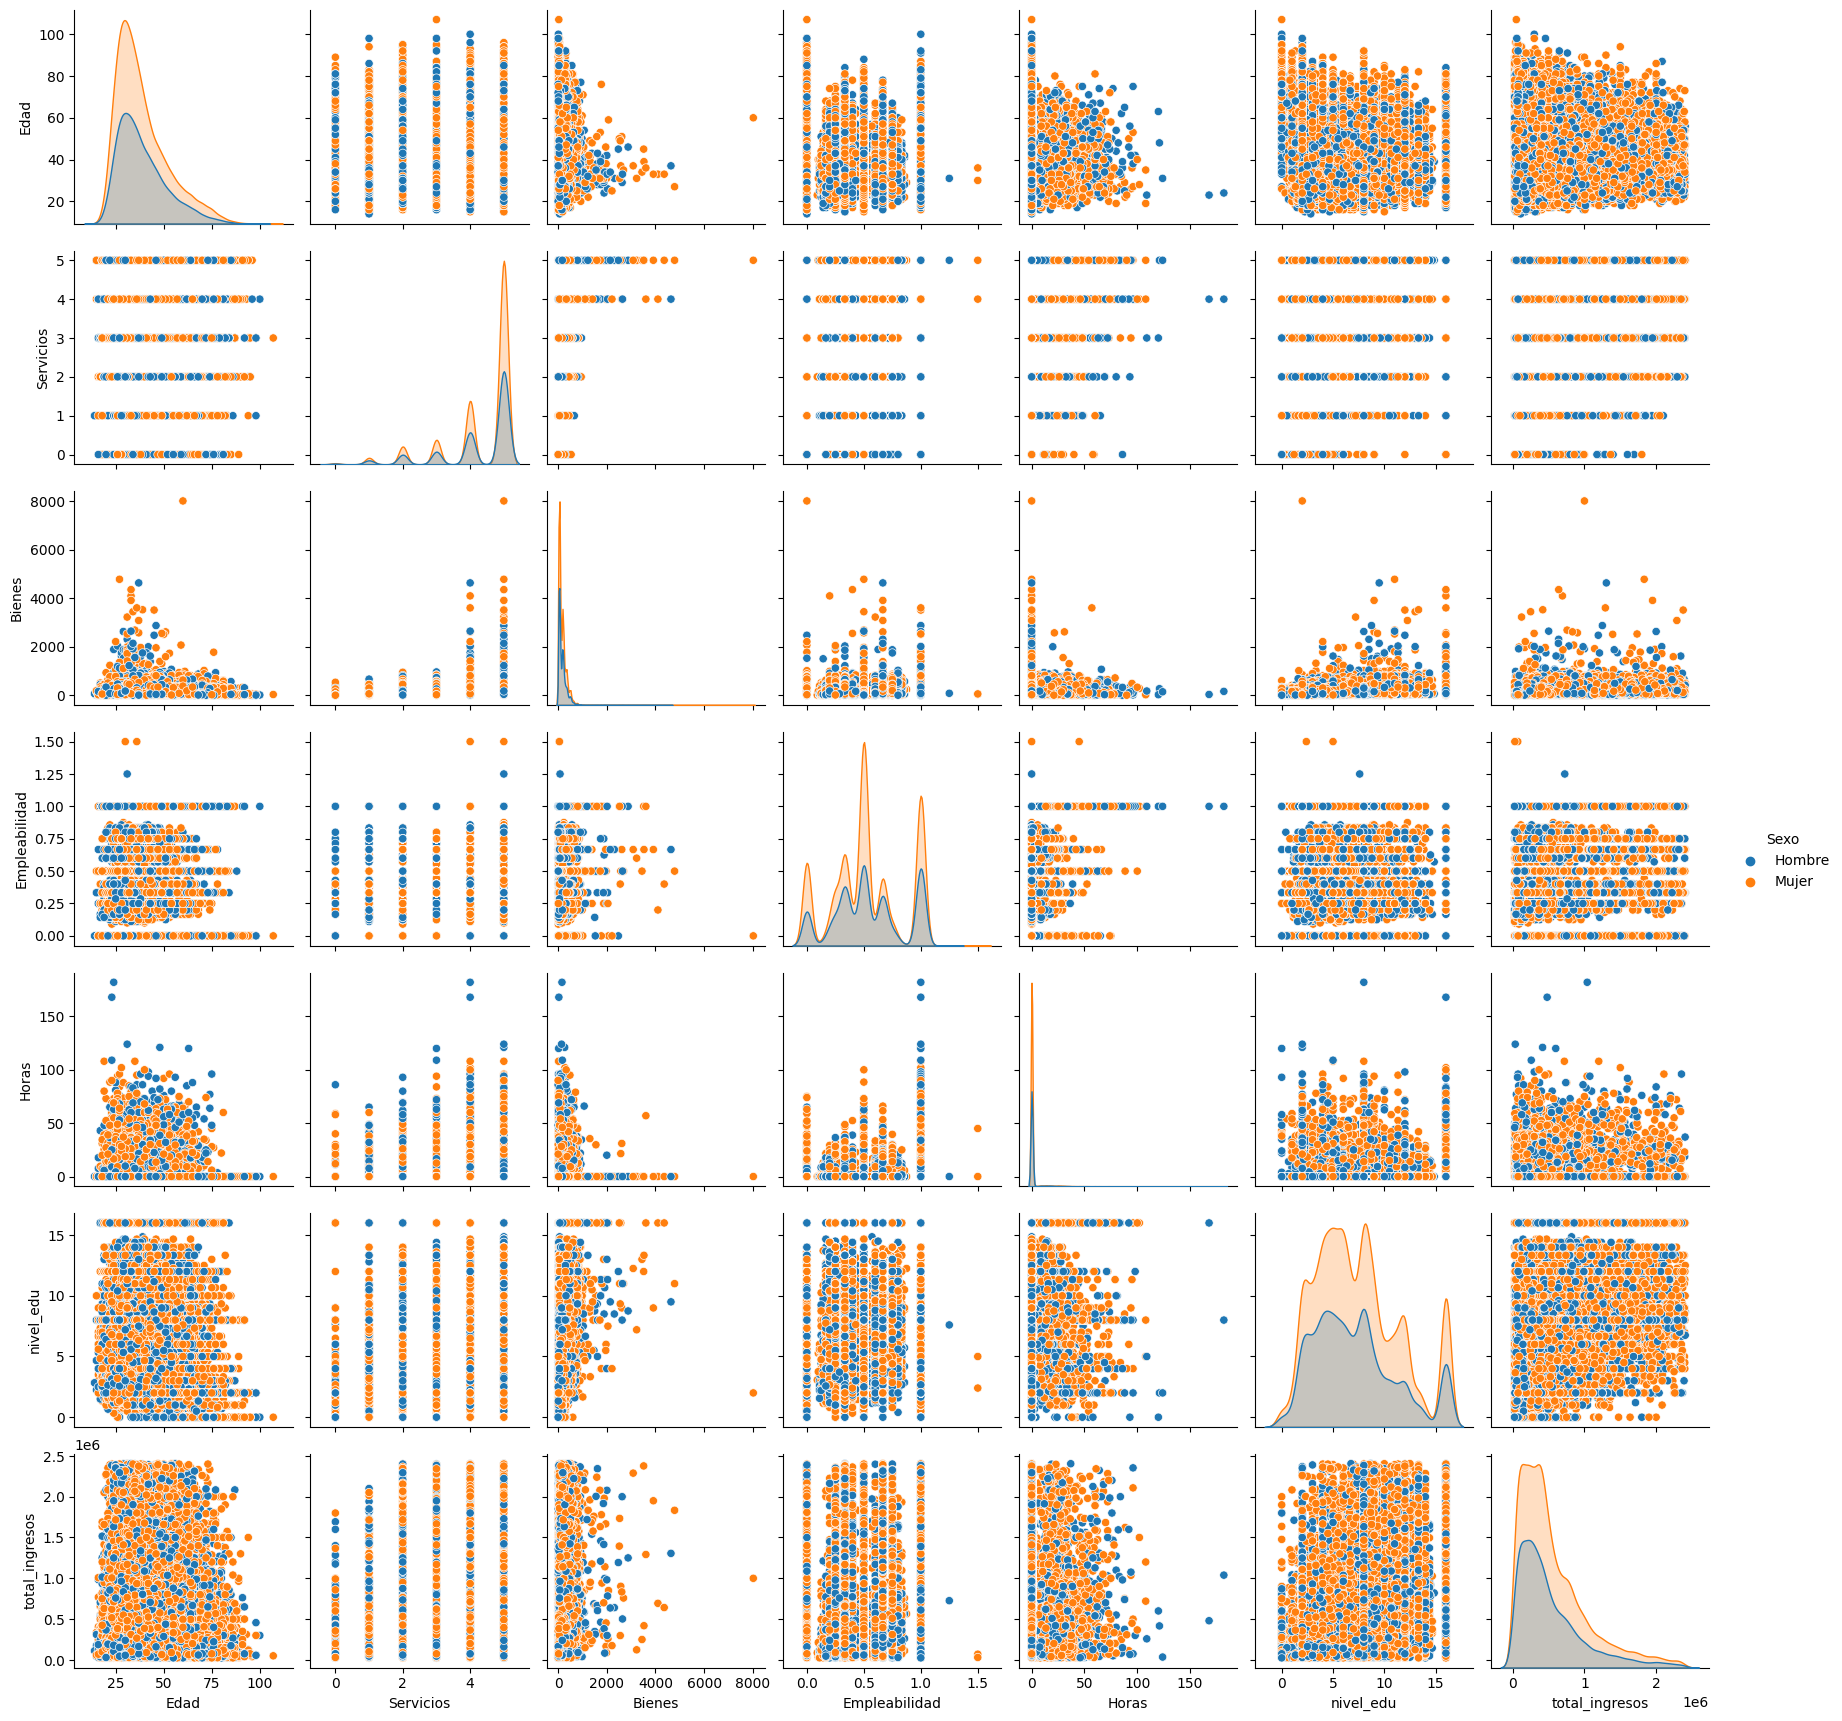

In [126]:
sns.pairplot(data=df_data[df_data["total_ingresos"]<ati_anor_sup], hue="Sexo")

## **Análisis estadístico de variables cualitativas**

##### **Análisis de frecuencias absolutas**
Cantidad de individuos que se encuentran en cada clase

In [71]:
cualitativas

['Sexo',
 'Estado_Civil',
 'Región',
 'tipo_casa',
 'estrato',
 'tipo_vivienda',
 'recibio_rentas_capital',
 'Percepción_ingreso']

In [72]:
df_data.Sexo.value_counts()

Mujer     37680
Hombre    21363
Name: Sexo, dtype: int64

In [73]:
for i in cualitativas:
  print(
      "\n"+
      i)
  display(df_data[i].value_counts())


Sexo


Mujer     37680
Hombre    21363
Name: Sexo, dtype: int64


Estado_Civil


Esta soltero (a)                                             23888
No esta casado(a) y vive en pareja hace dos años o más       14638
Esta casado (a)                                              11960
Esta separado(a) o divorciado(a)                              4959
No esta casado(a) y vive en pareja hace menos de dos años     1999
Esta viudo (a)                                                1599
Name: Estado_Civil, dtype: int64


Región


Central                 14476
Atlántica               13843
Pacífica                11255
Oriental                 8445
Nuevos departamentos     7061
Bogotá                   3017
San Andrés                946
Name: Región, dtype: int64


tipo_casa


Propia pagada     35024
Propia pagando    22329
En arriendo        1198
En usufructo        424
Sin título           48
Otra                 20
Name: tipo_casa, dtype: int64


estrato


2    21124
1    20386
3    12347
4     3055
5      998
6      481
0      165
Name: estrato, dtype: int64


tipo_vivienda


Casa                     27275
Cuarto en Inquilinato    21793
Cuarto Otro               5816
Apartamento               1809
Indígena                  1784
Otra                       566
Name: tipo_vivienda, dtype: int64


recibio_rentas_capital


No    38962
Si    20081
Name: recibio_rentas_capital, dtype: int64


Percepción_ingreso


No son suficientes     40891
Son suficientes        16491
Más que suficientes     1661
Name: Percepción_ingreso, dtype: int64

##### **Análisis de frecuencias relativas**
Porcentaje de individuos que se encuentran en cada clase

In [74]:
for i in cualitativas:
  print("\n"+i)
  display(round(df_data[i].value_counts()/len(df_data[i]),2))


Sexo


Mujer    0.640
Hombre   0.360
Name: Sexo, dtype: float64


Estado_Civil


Esta soltero (a)                                            0.400
No esta casado(a) y vive en pareja hace dos años o más      0.250
Esta casado (a)                                             0.200
Esta separado(a) o divorciado(a)                            0.080
No esta casado(a) y vive en pareja hace menos de dos años   0.030
Esta viudo (a)                                              0.030
Name: Estado_Civil, dtype: float64


Región


Central                0.250
Atlántica              0.230
Pacífica               0.190
Oriental               0.140
Nuevos departamentos   0.120
Bogotá                 0.050
San Andrés             0.020
Name: Región, dtype: float64


tipo_casa


Propia pagada    0.590
Propia pagando   0.380
En arriendo      0.020
En usufructo     0.010
Sin título       0.000
Otra             0.000
Name: tipo_casa, dtype: float64


estrato


2   0.360
1   0.350
3   0.210
4   0.050
5   0.020
6   0.010
0   0.000
Name: estrato, dtype: float64


tipo_vivienda


Casa                    0.460
Cuarto en Inquilinato   0.370
Cuarto Otro             0.100
Apartamento             0.030
Indígena                0.030
Otra                    0.010
Name: tipo_vivienda, dtype: float64


recibio_rentas_capital


No   0.660
Si   0.340
Name: recibio_rentas_capital, dtype: float64


Percepción_ingreso


No son suficientes    0.690
Son suficientes       0.280
Más que suficientes   0.030
Name: Percepción_ingreso, dtype: float64

### **Análisis gráfico de variables cualitativas**


#### **Diagrama de barras**
Cantidad de individuos que pertenecen a cada clase

Diagrama de barras de estrato

In [75]:
df_data.columns

Index(['Sexo', 'Edad', 'Estado_Civil', 'Región', 'recibio_rentas_capital',
       'Percepción_ingreso', 'Servicios', 'Bienes', 'Empleabilidad', 'Horas',
       'nivel_edu', 'tipo_casa', 'estrato', 'tipo_vivienda', 'total_ingresos'],
      dtype='object')

,estrato
2,21124
1,20386
3,12347
4,3055
5,998
6,481
0,165


Text(0, 0.5, 'Cantidad')

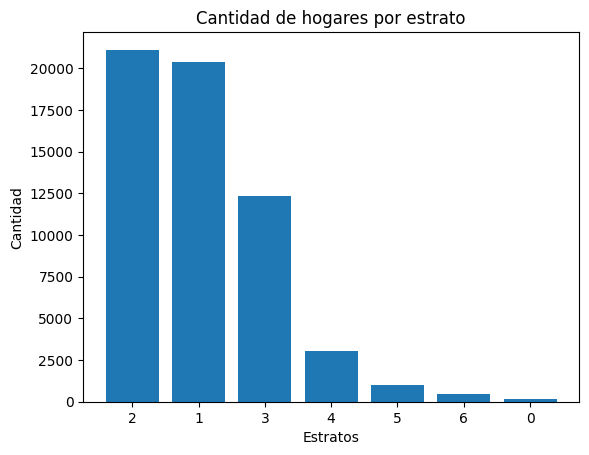

In [79]:
frecuencias= pd.DataFrame(df_data["estrato"].value_counts())
display(frecuencias)
#frecuencias   ## Valores a graficar

plt.bar(list(frecuencias.index),frecuencias["estrato"])
plt.title("Cantidad de hogares por estrato")
plt.xlabel('Estratos')
plt.ylabel('Cantidad')



Diagrama de barras tipo de casa con labels

,tipo_casa
Propia pagada,35024
Propia pagando,22329
En arriendo,1198
En usufructo,424
Sin título,48
Otra,20


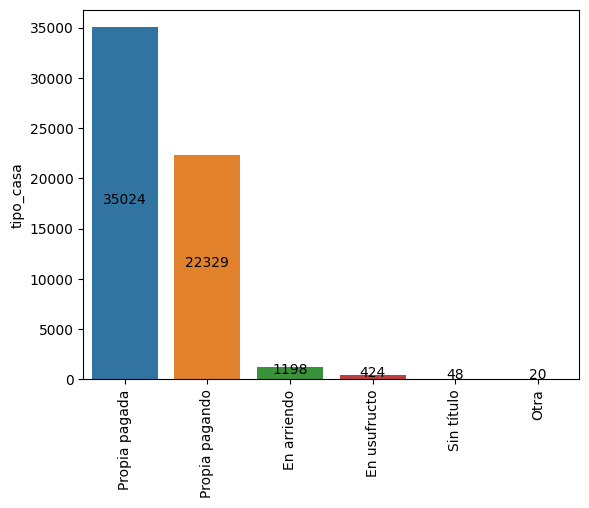

In [89]:
Tabla=pd.DataFrame(df_data["tipo_casa"].value_counts())
display(Tabla)
ax=sns.barplot(x=Tabla.index.to_list(), y=Tabla.columns.to_list()[0],data=Tabla)
for p in ax.patches: # patches es cada una de las barras
  height = int(p.get_height())
  ax.text(p.get_x()+p.get_width()/2,height/2,
            '{:1.0f}'.format(height),
            ha="center")
  plt.xticks(rotation=90) ## Rotación del texto

Diagrama de barras horizontal tipo de vivienda con labels

,tipo_vivienda
Casa,27275
Cuarto en Inquilinato,21793
Cuarto Otro,5816
Apartamento,1809
Indígena,1784
Otra,566


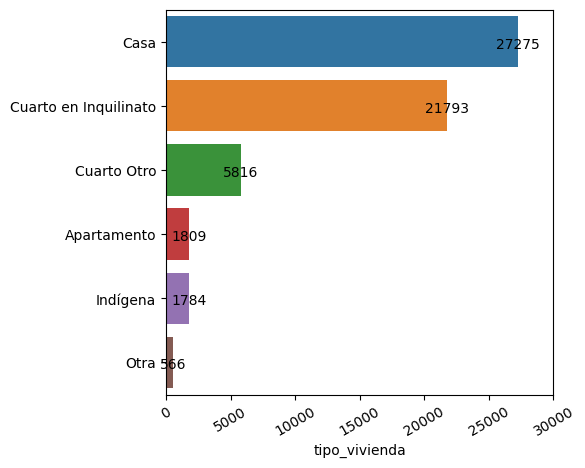

In [97]:
plt.figure(figsize=(5,5), dpi=100)
Tabla=pd.DataFrame(df_data["tipo_vivienda"].value_counts())
display(Tabla)
ax=sns.barplot(x=Tabla.columns.to_list()[0], y=Tabla.index.to_list(),data=Tabla)
plt.xlim(0,30000)
for p in ax.patches:
    width = int(p.get_width())
    ax.text(width,p.get_y()+0.5,
            '{:1.0f}'.format(width),
            ha="center")
    plt.xticks(rotation=30)

,estrato
2,21124
1,20386
3,12347
4,3055
5,998
6,481
0,165


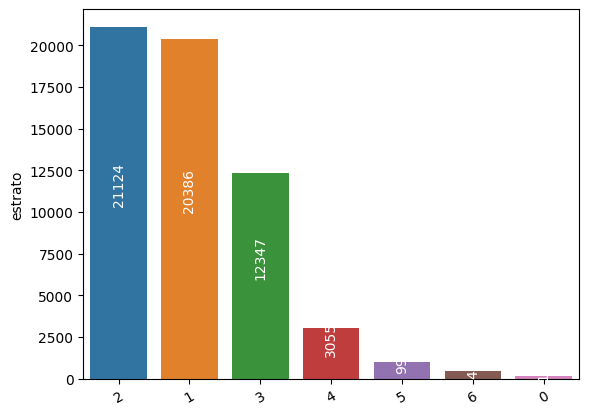

In [102]:
#Gráfico para estrato con labels
Estrato=pd.DataFrame(df_data["estrato"].value_counts())
display(Estrato)
ax=sns.barplot(x=Estrato.index.to_list(), y=Estrato.columns.to_list()[0],data=Estrato)
for p in ax.patches:
  height = int(p.get_height())
  ax.text(p.get_x()+p.get_width()/2,height/2,
            '{:1.0f}'.format(height),
            ha="center",rotation=90,color='white')
  plt.xticks(rotation=30) ## Rotación del texto

#### **Diagrama de torta**

Casa                     27275
Cuarto en Inquilinato    21793
Cuarto Otro               5816
Apartamento               1809
Indígena                  1784
Otra                       566
Name: tipo_vivienda, dtype: int64

Text(0, 0.5, '')

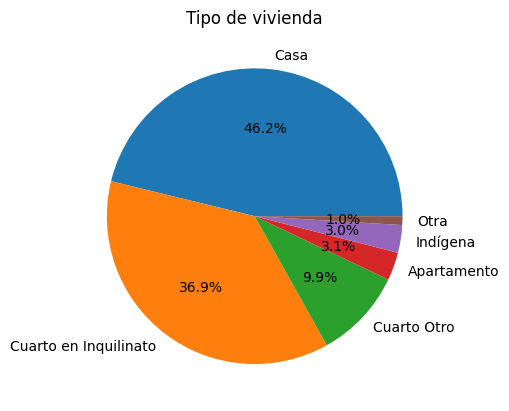

In [103]:
Tabla = df_data["tipo_vivienda"].value_counts()
display(Tabla)
Tabla.plot.pie(autopct="%.1f%%")
plt.title("Tipo de vivienda")
plt.ylabel('')

#### **Tablas de contingencia**
Cruce de variables cualitativas

In [105]:
#Frecuencias absolutas
pd.crosstab(df_data.tipo_vivienda,df_data.estrato,margins=True)

estrato,0,1,2,3,4,5,6,All
tipo_vivienda,,,,,,,,
Apartamento,0,312,703,499,172,86,34,1806
Casa,40,10314,9062,5318,1486,510,308,27038
Cuarto Otro,35,2447,2065,906,174,70,20,5717
Cuarto en Inquilinato,32,6055,8640,5400,1170,325,113,21735
Indígena,55,1026,461,129,25,0,4,1700
Otra,3,232,193,95,28,7,2,560
All,165,20386,21124,12347,3055,998,481,58556


In [106]:
#Frecuencias relativas
round(pd.crosstab(df_data.tipo_vivienda,df_data.estrato,margins=True)/min(df_data.tipo_vivienda.count(),df_data.estrato.count())*100,2)

estrato,0,1,2,3,4,5,6,All
tipo_vivienda,,,,,,,,
Apartamento,0.000,0.530,1.200,0.850,0.290,0.150,0.060,3.080
Casa,0.070,17.610,15.480,9.080,2.540,0.870,0.530,46.170
Cuarto Otro,0.060,4.180,3.530,1.550,0.300,0.120,0.030,9.760
Cuarto en Inquilinato,0.050,10.340,14.760,9.220,2.000,0.560,0.190,37.120
Indígena,0.090,1.750,0.790,0.220,0.040,0.000,0.010,2.900
Otra,0.010,0.400,0.330,0.160,0.050,0.010,0.000,0.960
All,0.280,34.810,36.070,21.090,5.220,1.700,0.820,100.000


In [107]:
# Frecuencias relativas filas
round(pd.crosstab(df_data.tipo_vivienda, df_data.estrato
           ).apply(lambda r: r/r.sum(),
                                axis=1)*100,2)

estrato,0,1,2,3,4,5,6
tipo_vivienda,,,,,,,
Apartamento,0.000,17.280,38.930,27.630,9.520,4.760,1.880
Casa,0.150,38.150,33.520,19.670,5.500,1.890,1.140
Cuarto Otro,0.610,42.800,36.120,15.850,3.040,1.220,0.350
Cuarto en Inquilinato,0.150,27.860,39.750,24.840,5.380,1.500,0.520
Indígena,3.240,60.350,27.120,7.590,1.470,0.000,0.240
Otra,0.540,41.430,34.460,16.960,5.000,1.250,0.360


In [108]:
# Frecuencias relativas por columnas
round(pd.crosstab(df_data.tipo_vivienda, df_data.estrato
           ).apply(lambda r: r/r.sum(),
                                axis=0)*100,2)

estrato,0,1,2,3,4,5,6
tipo_vivienda,,,,,,,
Apartamento,0.000,1.530,3.330,4.040,5.630,8.620,7.070
Casa,24.240,50.590,42.900,43.070,48.640,51.100,64.030
Cuarto Otro,21.210,12.000,9.780,7.340,5.700,7.010,4.160
Cuarto en Inquilinato,19.390,29.700,40.900,43.740,38.300,32.570,23.490
Indígena,33.330,5.030,2.180,1.040,0.820,0.000,0.830
Otra,1.820,1.140,0.910,0.770,0.920,0.700,0.420


##### **Gráfica del cruce de variables**

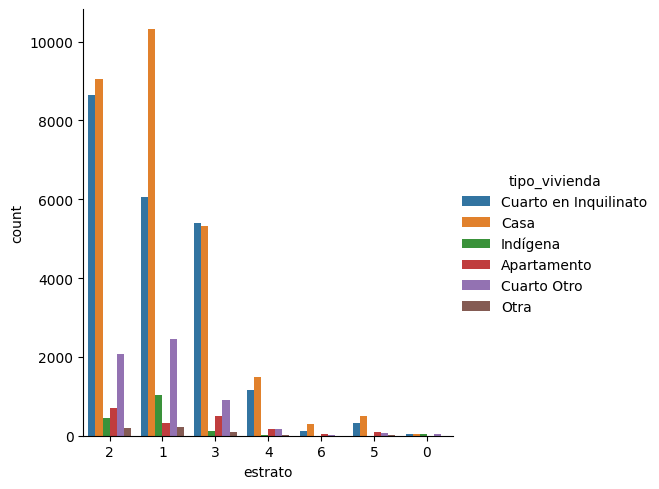

In [109]:
sns.catplot(x="estrato", kind="count", hue="tipo_vivienda", data=df_data)

In [110]:
df_data.columns


Index(['Sexo', 'Edad', 'Estado_Civil', 'Región', 'recibio_rentas_capital',
       'Percepción_ingreso', 'Servicios', 'Bienes', 'Empleabilidad', 'Horas',
       'nivel_edu', 'tipo_casa', 'estrato', 'tipo_vivienda', 'total_ingresos'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Propia pagada'),
  Text(1, 0, 'Propia pagando'),
  Text(2, 0, 'En arriendo'),
  Text(3, 0, 'En usufructo'),
  Text(4, 0, 'Sin título'),
  Text(5, 0, 'Otra')])

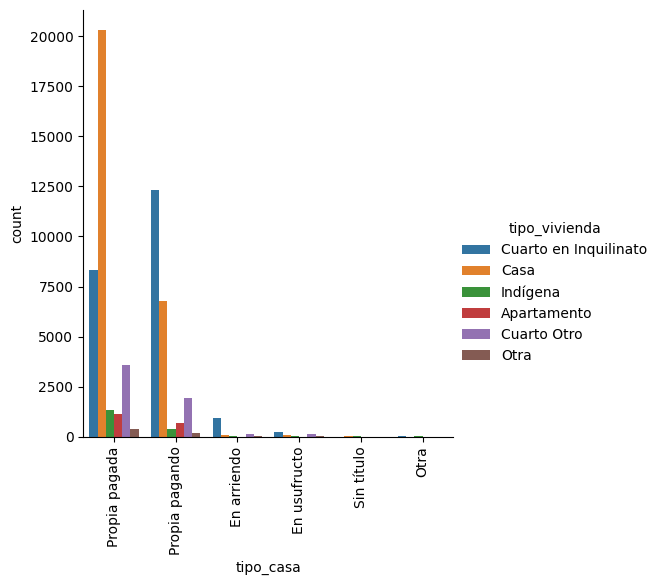

In [111]:
sns.catplot(x="tipo_casa", kind="count", hue="tipo_vivienda", data=df_data)
plt.xticks(rotation=90)

#### **Bibliografía**

In [113]:
df_data.columns

Index(['Sexo', 'Edad', 'Estado_Civil', 'Región', 'recibio_rentas_capital',
       'Percepción_ingreso', 'Servicios', 'Bienes', 'Empleabilidad', 'Horas',
       'nivel_edu', 'tipo_casa', 'estrato', 'tipo_vivienda', 'total_ingresos'],
      dtype='object')

In [119]:
df_data.dtypes

Sexo                       object
Edad                        int64
Estado_Civil               object
Región                     object
recibio_rentas_capital     object
Percepción_ingreso         object
Servicios                   int64
Bienes                    float64
Empleabilidad             float64
Horas                     float64
nivel_edu                 float64
tipo_casa                  object
estrato                    object
tipo_vivienda              object
total_ingresos            float64
dtype: object

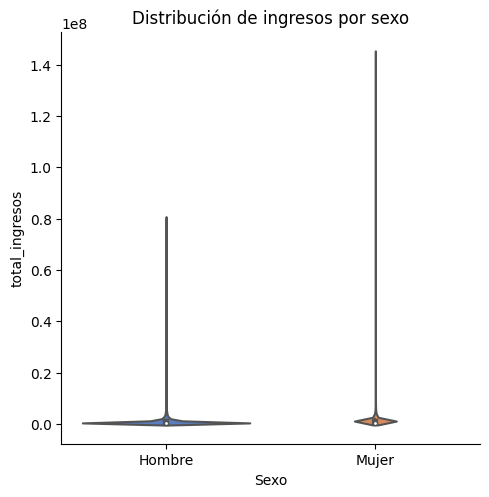

In [123]:
#Gráfico de violin:

sns.catplot(data=df_data, kind="violin", x="Sexo", y="total_ingresos", palette="muted")
plt.title("Distribución de ingresos por sexo")
plt.show()

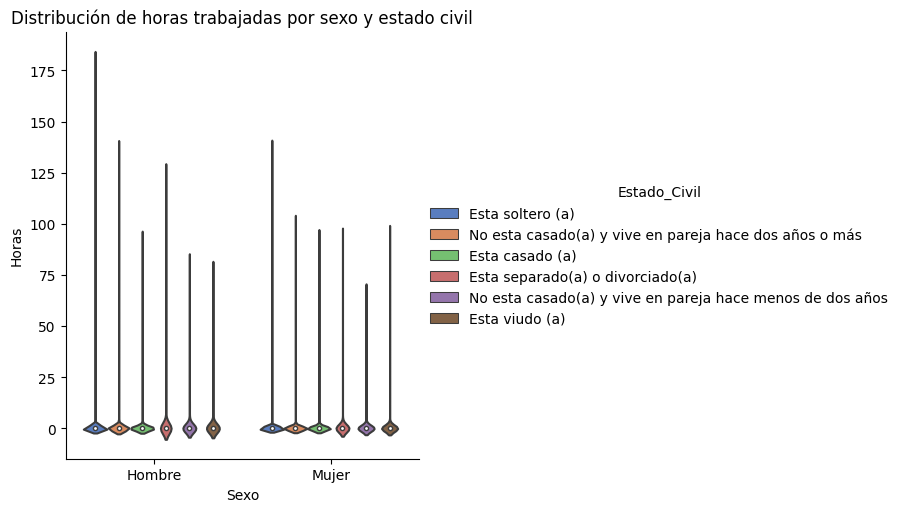

In [124]:
sns.catplot(data=df_data, kind="violin", x="Sexo", y="Horas", hue="Estado_Civil", palette="muted")
plt.title("Distribución de horas trabajadas por sexo y estado civil")
plt.show()

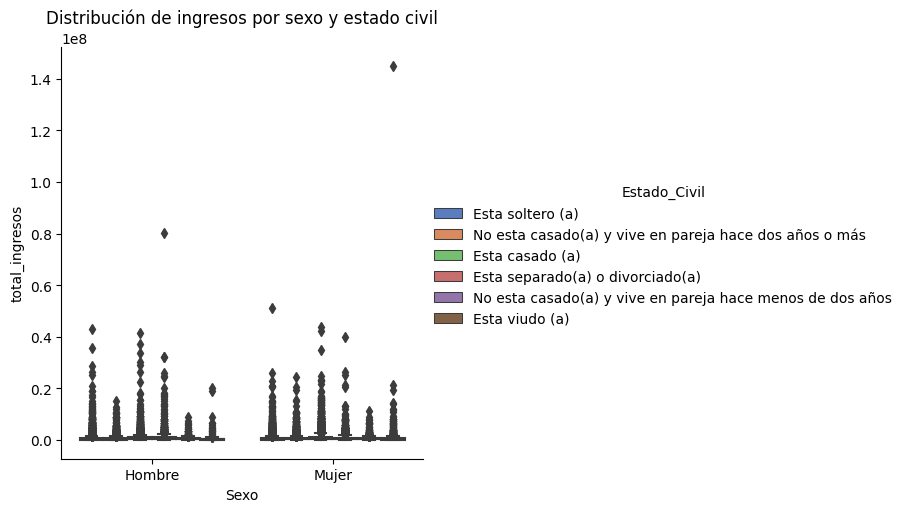

In [125]:
sns.catplot(data=df_data, kind="box", x="Sexo", y="total_ingresos", hue="Estado_Civil", palette="muted")
plt.title("Distribución de ingresos por sexo y estado civil")
plt.show()

In [ ]:
#https://seaborn.pydata.org/tutorial/function_overview.html
#https://seaborn.pydata.org/tutorial.html